In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  salary          32561 non-null  object
 12  salary K$       32561 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  object
 12  salary K$       30162 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Task 1
Print the count of men and women in the dataset.

In [6]:
female = df["sex"].value_counts().get("Female")
female

9782

In [7]:
mans = (df["sex"] == "Male").sum()
mans

20380

# Task 2
Find the average age of men in dataset

In [8]:
ave_age = df["age"].mean()
int(ave_age)

38

# Task 3
Get the percentage of people from Poland (native-country)

In [9]:
poles = (df["native-country"] == "Poland").sum()
poles

56

In [10]:
total_rows = len(df)
total_rows

30162

In [11]:
percentage_poles = (poles / total_rows) * 100
round(percentage_poles, 2)

0.19

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [12]:
age_salary = df.loc[:,["age", "salary"]]


In [13]:
low_salary = age_salary[age_salary["salary"] == "<=50K"]
round(low_salary["age"].mean(), 2)

36.61

In [14]:
round(low_salary["age"].std(), 2)

13.46

In [15]:
high_salary = age_salary[age_salary["salary"] == ">50K"]
round(high_salary["age"].mean(), 2)

43.96

In [16]:
round(high_salary["age"].std(), 2)

10.27

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [17]:
education_salary = df.loc[:, ["education", "salary"]]
without_high = education_salary.loc[~education_salary["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]
without_high[without_high["salary"] == ">50K"]

,education,salary
7,HS-grad,>50K
10,Some-college,>50K
55,Some-college,>50K
67,HS-grad,>50K
68,Some-college,>50K
...,...,...
32462,HS-grad,>50K
32518,HS-grad,>50K
32519,Some-college,>50K
32557,HS-grad,>50K


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [18]:
age_education = df.loc[:, ["age", "education"]]
age_education.groupby(["education"]).mean()

,age
education,
10th,37.897561
11th,32.363550
12th,32.013263
1st-4th,44.622517
5th-6th,41.649306
7th-8th,47.631957
9th,40.303297
Assoc-acdm,37.286706
Assoc-voc,38.246366


In [19]:
age_education.groupby(["education"]).describe()

age                                                    
               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  28.0  37.0  48.0  90.0
Masters       1627.0  43.740012  10.735356  18.0  36.0  43.0  50.0  90.0
Preschool       45.0  41.288889  15.175672  19.0  30.0  40.0  53.0  75.0
Prof-school    542.0  44.249077  11.428098  25.0  36.0  43.0  50.0  90.0
Some-college  6678.0  36.135370  13.073528  17.0  25.0  35.0  45.0  90.0

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [96]:
married_salary = df.loc[:, ["marital-status", "sex", "salary"]]
married_mans = married_salary[(married_salary["marital-status"].str.startswith("Married")) & (married_salary["sex"] == "Male")]
no_maried = married_salary[(~married_salary["marital-status"].str.startswith("Married")) & (married_salary["sex"] == "Male")]



In [128]:
df1 = pd.DataFrame({"maried": married_mans.groupby("salary")["sex"].count()})
df1

,maried
salary,
<=50K,7052
>50K,5723


In [130]:
df2 = pd.DataFrame({"no_married": no_maried.groupby("salary")["sex"].count()})
df2

,no_married
salary,
<=50K,6932
>50K,673


In [132]:
result = pd.concat([df1, df2], axis=1)
result

,maried,no_married
salary,,
<=50K,7052,6932
>50K,5723,673


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [113]:
hours_week = df.loc[:, ["hours-per-week"]].copy()
hours_week.max()

hours-per-week    99
dtype: int64

In [114]:
hours_week["num-workers"] = 1 * len(hours_week)
hours_week.groupby("hours-per-week").count()


,num-workers
hours-per-week,
1,7
2,15
3,24
4,27
5,38
...,...
95,2
96,5
97,2


In [115]:
pd.cut(hours_week["hours-per-week"], np.arange(0, hours_week["hours-per-week"].max() + 10, 10))

0        (30, 40]
1        (10, 20]
2        (30, 40]
3        (30, 40]
4        (30, 40]
           ...   
32556    (30, 40]
32557    (30, 40]
32558    (30, 40]
32559    (10, 20]
32560    (30, 40]
Name: hours-per-week, Length: 30162, dtype: category
Categories (10, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

<Axes: xlabel='hours-per-week'>

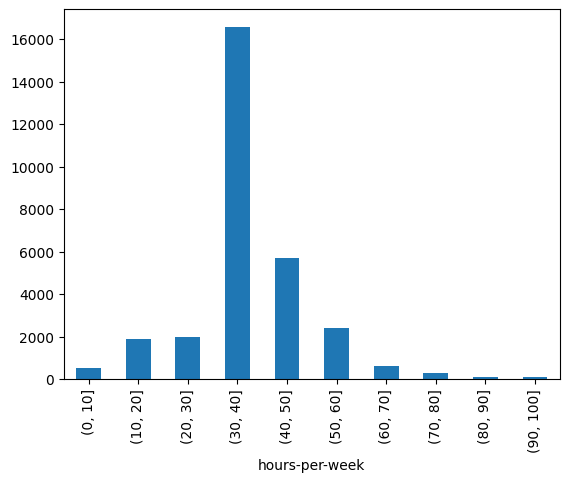

In [119]:
import matplotlib_inline
hours_week["hours-per-week"].groupby(pd.cut(hours_week["hours-per-week"], np.arange(0, hours_week["hours-per-week"].max() + 10, 10))).count().plot.bar()


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [6]:
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


In [8]:
df.corr()

,Unnamed: 0,age,hours-per-week,salary K$
Unnamed: 0,1.000000,-0.001126,-0.001890,0.000129
age,-0.001126,1.000000,0.101599,0.208203
hours-per-week,-0.001890,0.101599,1.000000,0.196378
salary K$,0.000129,0.208203,0.196378,1.000000
